<a href="https://colab.research.google.com/github/Sam-AL-BAL/SocialMedia_VS_Productivity_AI/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [ ]:
#Cargar el archivo
ruta = '/content/drive/MyDrive/Bootcamp_IA_TalentoTech/Proyecto/social_media_vs_productivity.csv'
df  = pd.read_csv(ruta, encoding = 'utf-8')
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             30000 non-null  int64  
 1   gender                          30000 non-null  object 
 2   job_type                        30000 non-null  object 
 3   daily_social_media_time         27235 non-null  float64
 4   social_platform_preference      30000 non-null  object 
 5   number_of_notifications         30000 non-null  int64  
 6   work_hours_per_day              30000 non-null  float64
 7   perceived_productivity_score    28386 non-null  float64
 8   actual_productivity_score       27635 non-null  float64
 9   stress_level                    28096 non-null  float64
 10  sleep_hours                     27402 non-null  float64
 11  screen_time_before_sleep        27789 non-null  float64
 12  breaks_during_work              

In [ ]:
# Columnas con datos faltantes

#Detectar valores faltantes
faltantes = df.isnull()

#Contar valores faltantes por columnas
DatosFaltantes = df.isnull().sum()

columnas_filtradas = DatosFaltantes[DatosFaltantes > 0]


columnas_filtradas

,0
daily_social_media_time,2765
perceived_productivity_score,1614
actual_productivity_score,2365
stress_level,1904
sleep_hours,2598
screen_time_before_sleep,2211
job_satisfaction_score,2730


In [ ]:
for columnas in columnas_filtradas.index:
    media = df[columnas].mean(skipna=True) #Obtener media de columnas skipeando los NaN Values
    print(f'Media de la columna {columnas}: {media}')
    df[columnas].fillna(media, inplace=True)  #rellenar NaN values con la media

df

Media de la columna daily_social_media_time: 3.113418084978472
Media de la columna perceived_productivity_score: 5.510488184340142
Media de la columna actual_productivity_score: 4.951804879665391
Media de la columna stress_level: 5.514058940774487
Media de la columna sleep_hours: 6.500247461760461
Media de la columna screen_time_before_sleep: 1.0255681548961753
Media de la columna job_satisfaction_score: 4.96490086213521


<ipython-input-44-b0ca72e70b9c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columnas].fillna(media, inplace=True)  #rellenar NaN values con la media


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,4.964901
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [ ]:
df=df.rename(columns={'age': 'edad',
                        'gender': 'genero',
                        'job_type':'tipo_trabajo',
                        'daily_social_media_time':'tiempo_diario_redes_socialies',
                   'social_platform_preference':'redes_sociales_preferencia',
                   'number_of_notifications':'cantidad_notificaciones',
                   'work_hours_per_day':'horas_trabajo_por_dia',
                   'perceived_productivity_score':'puntuacion_productividad_percibida',
                   'actual_productivity_score':'puntuacion_productividad_actual',
                   'stress_level':'nivel_estres',
                   'sleep_hours':'horas_sueño',
                   'screen_time_before_sleep':'tiempo_pantalla_antes_dormir',
                   'breaks_during_work':'descanso_durante_trabajo',
                   'uses_focus_apps':'uso_aplicaciones_enfoque',
                   'coffee_consumption_per_day':'consumo_cafe_por_dia',
                   'days_feeling_burnout_per_month':'dias_sensacion_agotamiento_mes',
                   'weekly_offline_hours':'horas_desconexion_semanal',
                   'job_satisfaction_score':'puntuacion_satisfaccion_laboral',
                   })

In [ ]:
df

,edad,genero,tipo_trabajo,tiempo_diario_redes_socialies,redes_sociales_preferencia,cantidad_notificaciones,horas_trabajo_por_dia,puntuacion_productividad_percibida,puntuacion_productividad_actual,nivel_estres,horas_sueño,tiempo_pantalla_antes_dormir,descanso_durante_trabajo,uso_aplicaciones_enfoque,has_digital_wellbeing_enabled,consumo_cafe_por_dia,dias_sensacion_agotamiento_mes,horas_desconexion_semanal,puntuacion_satisfaccion_laboral
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,False,4,5,21.776927,4.964901
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,False,2,9,12.511871,7.854711


In [ ]:
df = df.drop(columns=['has_digital_wellbeing_enabled'])


In [ ]:
df

,edad,genero,tipo_trabajo,tiempo_diario_redes_socialies,redes_sociales_preferencia,cantidad_notificaciones,horas_trabajo_por_dia,puntuacion_productividad_percibida,puntuacion_productividad_actual,nivel_estres,horas_sueño,tiempo_pantalla_antes_dormir,descanso_durante_trabajo,uso_aplicaciones_enfoque,consumo_cafe_por_dia,dias_sensacion_agotamiento_mes,horas_desconexion_semanal,puntuacion_satisfaccion_laboral
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,4,11,21.927072,6.336688
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,2,25,0.000000,3.412427
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,3,17,10.322044,2.474944
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,0,4,23.876616,1.733670
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,1,30,10.653519,9.693060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,34,Female,Health,1.877297,Facebook,59,10.226358,3.348512,3.465815,8.0,5.480462,1.412655,9,False,4,5,21.776927,4.964901
29996,39,Male,Health,4.437784,Instagram,46,4.692862,8.133213,6.659294,8.0,3.045393,0.148936,3,False,1,29,4.111370,6.155613
29997,42,Male,Education,17.724981,TikTok,64,10.915036,8.611005,8.658912,5.0,5.491520,1.224296,10,False,1,2,1.888315,6.285237
29998,20,Female,Education,3.796634,Instagram,56,6.937410,7.767076,6.895583,8.0,6.816069,0.234483,1,False,2,9,12.511871,7.854711


In [ ]:
!pip install streamlit scikit-learn pandas matplotlib


In [ ]:
correlaciones= df.corr(numeric_only=True) #



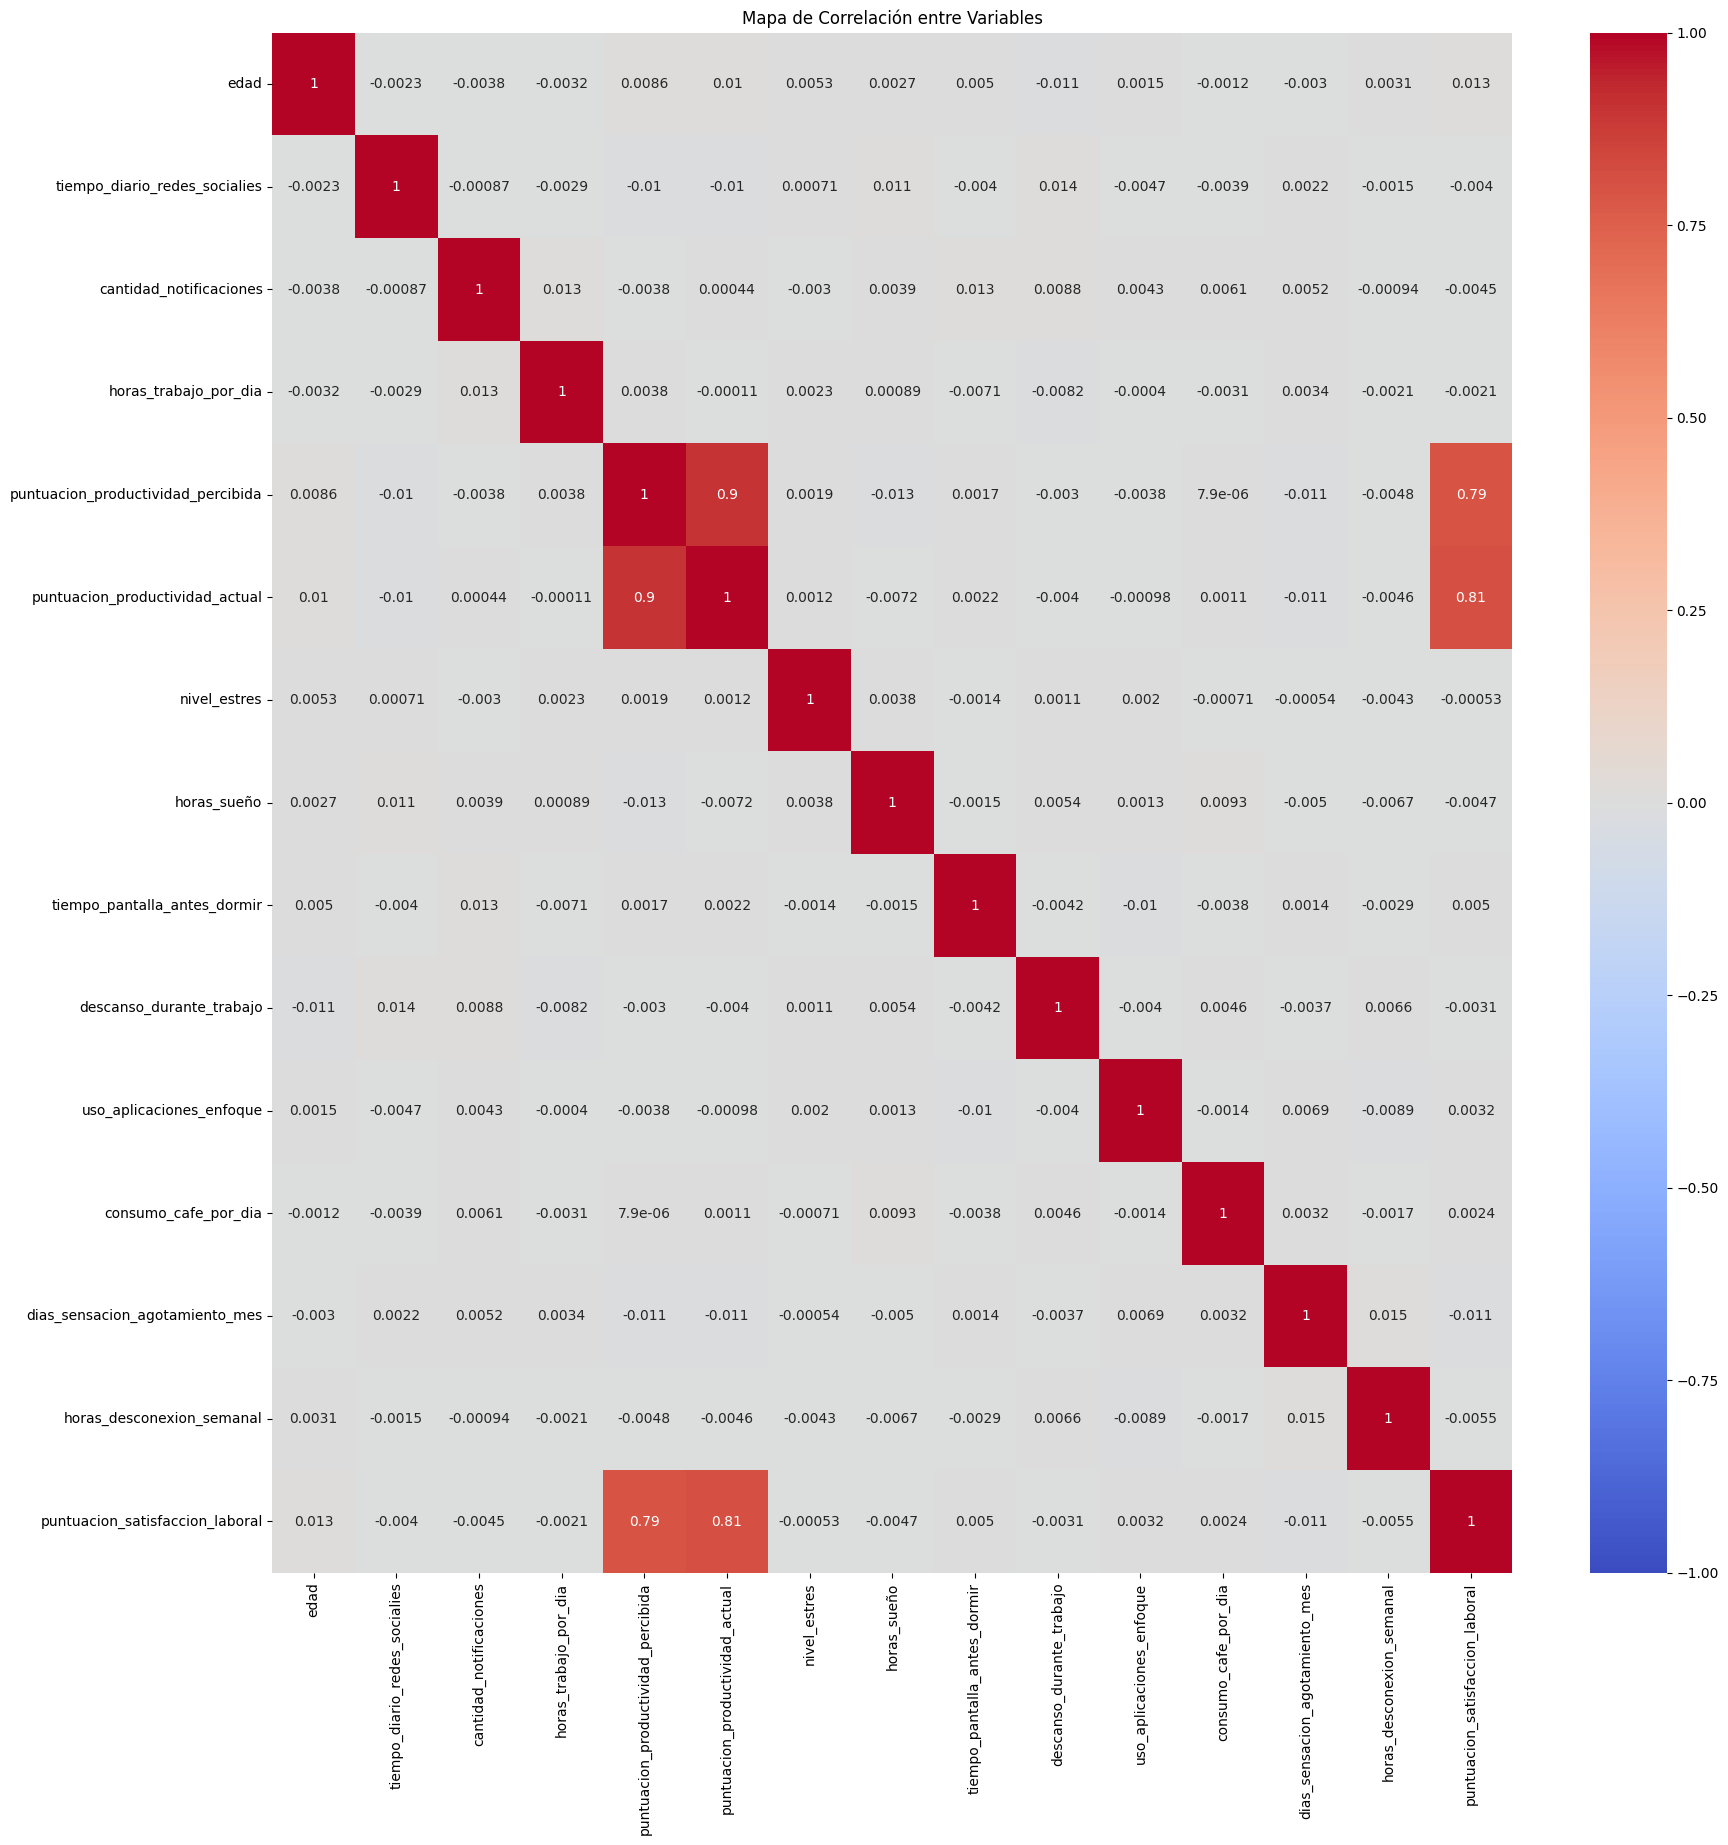

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear mapa de calor
plt.figure(figsize=(20, 20))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Mapa de Correlación entre Variables")
plt.show()


In [ ]:
#Identificación de variables
X = df[['nivel_estres', 'horas_sueño', 'consumo_cafe_por_dia']] #Variable predictora
Y = df['puntuacion_productividad_actual'] #Variable a predecir.

In [ ]:
Y

,puntuacion_productividad_actual
0,7.291555
1,5.165093
2,3.474053
3,1.774869
4,4.951805
...,...
29995,3.465815
29996,6.659294
29997,8.658912
29998,6.895583


In [ ]:
#Entrenamiento para dar marcha
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size= 0.8, random_state= 42)


In [ ]:
# 4. Escalar datos
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.values.reshape(-1, 1)).ravel()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)

In [ ]:
# 6. Crear y entrenar modelo SVM (Regresión)
svm = SVR(kernel='linear')
svm.fit(X_train, Y_train)

SVR()

In [ ]:
# 7. Predicción
Y_pred_scaled = svm.predict(X_test)
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled.reshape(-1, 1)).ravel()
Y_test_orig = scaler_Y.inverse_transform(Y_test.reshape(-1, 1)).ravel()

In [ ]:
# 8. Métricas
print("MSE:", mean_squared_error(Y_test_orig, Y_pred))
print("R2 Score:", r2_score(Y_test_orig, Y_pred))

MSE: 3.263077642643647
R2 Score: -0.007036961954047127


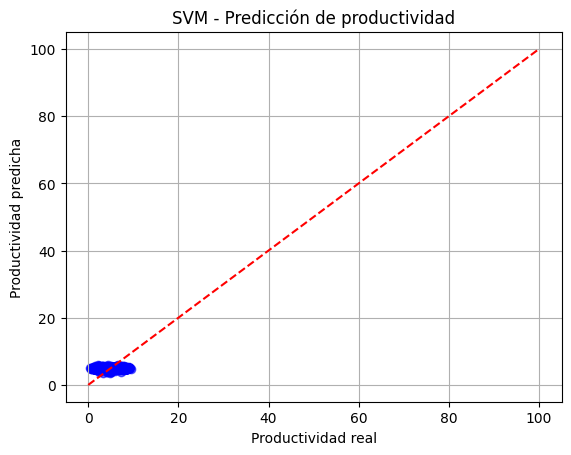

In [ ]:
# 9. Visualización
plt.scatter(Y_test_orig, Y_pred, color='blue', alpha=0.6)
plt.plot([0, 100], [0, 100], 'r--')
plt.xlabel('Productividad real')
plt.ylabel('Productividad predicha')
plt.title('SVM - Predicción de productividad')
plt.grid(True)
plt.show()